In [1]:
# Loading necessary libraries and packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import sklearn.linear_model, sklearn.datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, LinearRegression ,LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adityadesai13/used-car-dataset-ford-and-mercedes")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Kasiee\.cache\kagglehub\datasets\adityadesai13\used-car-dataset-ford-and-mercedes\versions\3


In [3]:
import pandas as pd
import os

print("\nFiles in dataset:")
for file in os.listdir(path):
    print(file)


Files in dataset:
audi.csv
bmw.csv
cclass.csv
focus.csv
ford.csv
hyundi.csv
merc.csv
skoda.csv
toyota.csv
unclean cclass.csv
unclean focus.csv
vauxhall.csv
vw.csv


In [4]:
# List of CSV filenames
csv_files = [
    "vw.csv", "cclass.csv", "audi.csv", "bmw.csv", "vauxhall.csv",
    "ford.csv", "hyundi.csv", "merc.csv",
    "toyota.csv", "skoda.csv", "focus.csv"
]

# Loop through and create a unique DataFrame for each CSV
for file in csv_files:
    file_path = os.path.join(path, file)
    if os.path.exists(file_path):
        # Create a valid Python variable name (replace spaces and dots)
        df_name = file.replace(".csv", "").replace(" ", "_")
        globals()[df_name] = pd.read_csv(file_path)
        print(f"✅ Loaded: {df_name} ({eval(df_name).shape[0]} rows, {eval(df_name).shape[1]} columns)")
    else:
        print(f"File not found: {file}")

✅ Loaded: vw (15157 rows, 9 columns)
✅ Loaded: cclass (3899 rows, 7 columns)
✅ Loaded: audi (10668 rows, 9 columns)
✅ Loaded: bmw (10781 rows, 9 columns)
✅ Loaded: vauxhall (13632 rows, 9 columns)
✅ Loaded: ford (17965 rows, 9 columns)
✅ Loaded: hyundi (4860 rows, 9 columns)
✅ Loaded: merc (13119 rows, 9 columns)
✅ Loaded: toyota (6738 rows, 9 columns)
✅ Loaded: skoda (6267 rows, 9 columns)
✅ Loaded: focus (5454 rows, 7 columns)


In [5]:
print(ford.head())

     model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   Fiesta  2017  12000    Automatic    15944   Petrol  150  57.7         1.0
1    Focus  2018  14000       Manual     9083   Petrol  150  57.7         1.0
2    Focus  2017  13000       Manual    12456   Petrol  150  57.7         1.0
3   Fiesta  2019  17500       Manual    10460   Petrol  145  40.3         1.5
4   Fiesta  2019  16500    Automatic     1482   Petrol  145  48.7         1.0


In [6]:
make_to_df = {
    "vw": vw,
    "cclass": cclass,
    "audi": audi,
    "bmw": bmw,
    "vauxhall": vauxhall,
    "ford": ford,
    "hyundi": hyundi,
    "merc": merc,
    "toyota": toyota,
    "skoda": skoda,
    "focus": focus
}

# Add "Make" column to each and combine
combined_df = pd.concat(
    [df.assign(Make=make.capitalize()) for make, df in make_to_df.items()],
    ignore_index=True
)

print("Combined DataFrame created successfully!")
print("Shape:", combined_df.shape)

Combined DataFrame created successfully!
Shape: (108540, 11)


In [7]:
combined_df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make,tax(£)
0,T-Roc,2019,25000,Automatic,13904,Diesel,145.0,49.6,2.0,Vw,NaN
1,T-Roc,2019,26883,Automatic,4562,Diesel,145.0,49.6,2.0,Vw,NaN
2,T-Roc,2019,20000,Manual,7414,Diesel,145.0,50.4,2.0,Vw,NaN
3,T-Roc,2019,33492,Automatic,4825,Petrol,145.0,32.5,2.0,Vw,NaN
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150.0,39.8,1.5,Vw,NaN
...,...,...,...,...,...,...,...,...,...,...,...
108535,Focus,2019,18745,Manual,7855,Diesel,NaN,NaN,2.0,Focus,NaN
108536,Focus,2019,16350,Manual,13891,Petrol,NaN,NaN,1.0,Focus,NaN
108537,Focus,2019,16850,Manual,13452,Petrol,NaN,NaN,1.0,Focus,NaN
108538,Focus,2019,17310,Automatic,13376,Petrol,NaN,NaN,1.0,Focus,NaN


In [8]:
merc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


In [9]:
import pandas as pd

# Dictionary mapping DataFrame names to their objects
datasets = {
    "vw": vw,
    "cclass": cclass,
    "audi": audi,
    "bmw": bmw,
    "vauxhall": vauxhall,
    "ford": ford,
    "hyundi": hyundi,
    "merc": merc,
    "toyota": toyota,
    "skoda": skoda,
    "focus": focus
}

# Loop through and summarize each DataFrame
for name, df in datasets.items():
    print("=" * 60)
    print(f"DataFrame: {name}")
    print("-" * 60)

    # Basic info
    print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
    print("\nColumn Info:")
    print(df.info())

    # Unique values per column
    print("\nUnique Values:")
    for col in df.columns:
        unique_count = df[col].nunique(dropna=False)
        sample_values = df[col].dropna().unique()[:10]  # show first 10 unique
        print(f"  • {col}: {unique_count} unique values — examples: {sample_values}")

    print("\nMissing Values per Column:")
    print(df.isnull().sum())
    print("\n\n")


DataFrame: vw
------------------------------------------------------------
Shape: 15157 rows × 9 columns

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   tax           15157 non-null  int64  
 7   mpg           15157 non-null  float64
 8   engineSize    15157 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB
None

Unique Values:
  • model: 27 unique values — examples: [' T-Roc' ' Golf' ' Passat' ' T-Cross' ' Polo' ' Tiguan' ' Sharan' ' Up'
 ' Scirocco' ' Beetle']
  • year: 21 unique values — examples: [2019 2020 2018 2017 2015 2016 2013 2014 

Upon further invbestigation we can drop the cclass and focus dataframes as they are both models of other car types and also have different set of features to the other dataframes.

In [10]:
make_to_df = {
    "vw": vw,
    "audi": audi,
    "bmw": bmw,
    "vauxhall": vauxhall,
    "ford": ford,
    "hyundi": hyundi,
    "merc": merc,
    "toyota": toyota,
    "skoda": skoda,
}

# Add "Make" column to each and combine
combined_df = pd.concat(
    [df.assign(Make=make.capitalize()) for make, df in make_to_df.items()],
    ignore_index=True
)

print("Combined DataFrame created successfully!")
print("Shape:", combined_df.shape)

Combined DataFrame created successfully!
Shape: (99187, 11)


In [11]:
combined_df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make,tax(£)
0,T-Roc,2019,25000,Automatic,13904,Diesel,145.0,49.6,2.0,Vw,NaN
1,T-Roc,2019,26883,Automatic,4562,Diesel,145.0,49.6,2.0,Vw,NaN
2,T-Roc,2019,20000,Manual,7414,Diesel,145.0,50.4,2.0,Vw,NaN
3,T-Roc,2019,33492,Automatic,4825,Petrol,145.0,32.5,2.0,Vw,NaN
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150.0,39.8,1.5,Vw,NaN
...,...,...,...,...,...,...,...,...,...,...,...
99182,Yeti,2014,11440,Semi-Auto,14569,Petrol,160.0,44.8,1.2,Skoda,NaN
99183,Octavia,2014,10990,Semi-Auto,49999,Petrol,30.0,56.5,1.4,Skoda,NaN
99184,Fabia,2017,9500,Semi-Auto,17131,Petrol,145.0,61.4,1.0,Skoda,NaN
99185,Citigo,2016,5999,Manual,21747,Petrol,20.0,62.8,1.0,Skoda,NaN


In [12]:
import numpy as np

# Consolidate 'tax' and 'tax(£)' into a single 'tax' column
# Fill NaN values in 'tax' with values from 'tax(£)'
combined_df['tax'] = combined_df['tax'].fillna(combined_df['tax(£)'])

# Drop the redundant 'tax(£)' column
combined_df = combined_df.drop(columns=['tax(£)'])

# Display the info for the updated DataFrame
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99187 entries, 0 to 99186
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99187 non-null  object 
 1   year          99187 non-null  int64  
 2   price         99187 non-null  int64  
 3   transmission  99187 non-null  object 
 4   mileage       99187 non-null  int64  
 5   fuelType      99187 non-null  object 
 6   tax           99187 non-null  float64
 7   mpg           99187 non-null  float64
 8   engineSize    99187 non-null  float64
 9   Make          99187 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 7.6+ MB


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

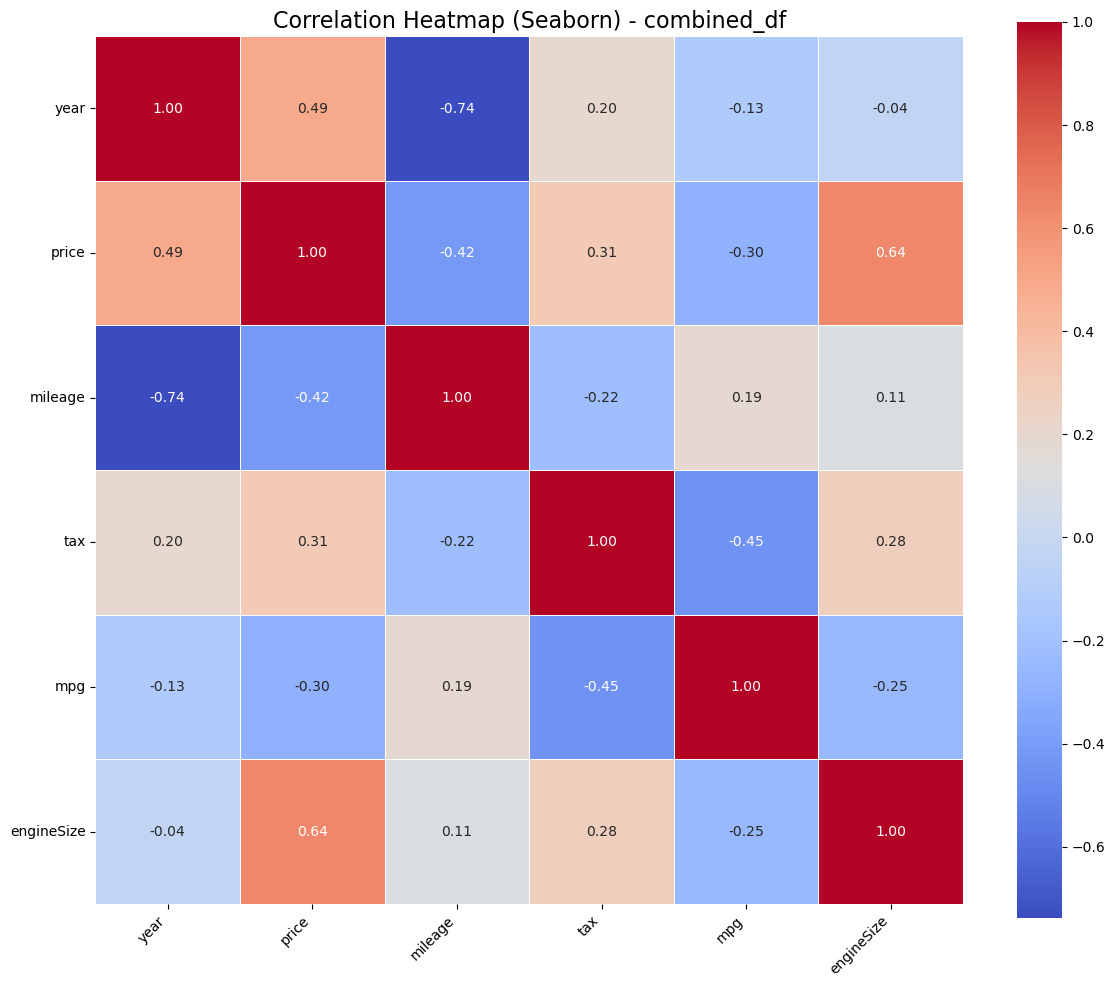

In [14]:
numeric_df = combined_df.select_dtypes(include=["int64", "float64"])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True
)

plt.title("Correlation Heatmap (Seaborn) - combined_df", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [15]:
categorical_columns = combined_df.select_dtypes(include=["object"]).columns

for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  print(combined_df[col].value_counts())
  print()

Categories and number of occurrences for 'model'
model
 Fiesta     6557
 Golf       4863
 Focus      4588
 C Class    3747
 Corsa      3441
            ... 
 Accent        1
230            1
180            1
220            1
200            1
Name: count, Length: 195, dtype: int64

Categories and number of occurrences for 'transmission'
transmission
Manual       56445
Semi-Auto    22677
Automatic    20056
Other            9
Name: count, dtype: int64

Categories and number of occurrences for 'fuelType'
fuelType
Petrol      54928
Diesel      40928
Hybrid       3078
Other         247
Electric        6
Name: count, dtype: int64

Categories and number of occurrences for 'Make'
Make
Ford        17965
Vw          15157
Vauxhall    13632
Merc        13119
Bmw         10781
Audi        10668
Toyota       6738
Skoda        6267
Hyundi       4860
Name: count, dtype: int64



In [16]:
combined_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000,99187.000000
mean,2017.087723,16805.347656,23058.914213,120.299838,55.166825,1.663280
std,2.123934,9866.773417,21148.523721,63.150926,16.138522,0.557646
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7425.000000,125.000000,47.100000,1.200000
50%,2017.000000,14495.000000,17460.000000,145.000000,54.300000,1.600000
75%,2019.000000,20870.000000,32339.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [17]:
filtered_df = combined_df[combined_df["year"] > 2020]

In [18]:
filtered_df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
67964,Fiesta,2060,6495,Automatic,54807,Petrol,205.0,42.8,1.4,Ford


In [19]:
combined_df.drop(
    combined_df[combined_df["year"] == 2060].index,
    inplace=True
)

In [20]:
combined_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000,99186.000000
mean,2017.087291,16805.451606,23058.594126,120.298984,55.166950,1.663283
std,2.119570,9866.768844,21148.390071,63.150672,16.138556,0.557649
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7424.500000,125.000000,47.100000,1.200000
50%,2017.000000,14495.000000,17460.000000,145.000000,54.300000,1.600000
75%,2019.000000,20870.000000,32337.750000,145.000000,62.800000,2.000000
max,2020.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


# Data Pre Processing

In [21]:
Y = combined_df['price']
X = combined_df.drop(['price'],axis = 1)

In [22]:
Y

0        25000
1        26883
2        20000
3        33492
4        22900
         ...  
99182    11440
99183    10990
99184     9500
99185     5999
99186     9232
Name: price, Length: 99186, dtype: int64

In [23]:
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,T-Roc,2019,Automatic,13904,Diesel,145.0,49.6,2.0,Vw
1,T-Roc,2019,Automatic,4562,Diesel,145.0,49.6,2.0,Vw
2,T-Roc,2019,Manual,7414,Diesel,145.0,50.4,2.0,Vw
3,T-Roc,2019,Automatic,4825,Petrol,145.0,32.5,2.0,Vw
4,T-Roc,2019,Semi-Auto,6500,Petrol,150.0,39.8,1.5,Vw
...,...,...,...,...,...,...,...,...,...
99182,Yeti,2014,Semi-Auto,14569,Petrol,160.0,44.8,1.2,Skoda
99183,Octavia,2014,Semi-Auto,49999,Petrol,30.0,56.5,1.4,Skoda
99184,Fabia,2017,Semi-Auto,17131,Petrol,145.0,61.4,1.0,Skoda
99185,Citigo,2016,Manual,21747,Petrol,20.0,62.8,1.0,Skoda


In [24]:
# Split the data into non-test/test data
X_non_test, X_test, y_non_test, y_test = train_test_split(X, Y, test_size=0.20, shuffle=True, random_state=0)

# Split the non-test data into non-test/test data
X_train, X_valid, y_train, y_valid = train_test_split(X_non_test, y_non_test, test_size=0.25, shuffle=True, random_state=0)

In [25]:
# To test the polynomial feature
X_train_raw = X_train.copy()
X_valid_raw = X_valid.copy()
X_test_raw = X_test.copy()

In [26]:
categorical_columns = ['model','year','transmission','fuelType','Make']
numerical_columns = ['mileage','tax','mpg','engineSize']

In [27]:
ct_cat = ColumnTransformer(
    [
        (
            "onehot_categorical",
            OneHotEncoder(handle_unknown='ignore', sparse_output=False),
            categorical_columns,
        ),
         (
            'num',
            MinMaxScaler(),
            numerical_columns
        ),
    ],
    remainder="passthrough",
    verbose_feature_names_out=False
)
encoded_array = ct_cat.fit_transform(X_train)

encoded_col_names= ct_cat.get_feature_names_out()
print(encoded_col_names)
X_train = pd.DataFrame(encoded_array, columns=encoded_col_names)

['model_ 1 Series' 'model_ 2 Series' 'model_ 3 Series' 'model_ 4 Series'
 'model_ 5 Series' 'model_ 6 Series' 'model_ 7 Series' 'model_ 8 Series'
 'model_ A Class' 'model_ A1' 'model_ A2' 'model_ A3' 'model_ A4'
 'model_ A5' 'model_ A6' 'model_ A7' 'model_ A8' 'model_ Accent'
 'model_ Adam' 'model_ Agila' 'model_ Amarok' 'model_ Amica'
 'model_ Ampera' 'model_ Antara' 'model_ Arteon' 'model_ Astra'
 'model_ Auris' 'model_ Avensis' 'model_ Aygo' 'model_ B Class'
 'model_ B-MAX' 'model_ Beetle' 'model_ C Class' 'model_ C-HR'
 'model_ C-MAX' 'model_ CC' 'model_ CL Class' 'model_ CLA Class'
 'model_ CLC Class' 'model_ CLK' 'model_ CLS Class' 'model_ Caddy'
 'model_ Caddy Life' 'model_ Caddy Maxi' 'model_ Caddy Maxi Life'
 'model_ California' 'model_ Camry' 'model_ Caravelle' 'model_ Cascada'
 'model_ Citigo' 'model_ Combo Life' 'model_ Corolla' 'model_ Corsa'
 'model_ Crossland X' 'model_ E Class' 'model_ EcoSport' 'model_ Edge'
 'model_ Eos' 'model_ Escort' 'model_ Fabia' 'model_ Fiesta'


In [28]:
encoded_array = ct_cat.transform(X_valid)

encoded_col_names= ct_cat.get_feature_names_out()
print(encoded_col_names)
X_valid = pd.DataFrame(encoded_array, columns=encoded_col_names)

['model_ 1 Series' 'model_ 2 Series' 'model_ 3 Series' 'model_ 4 Series'
 'model_ 5 Series' 'model_ 6 Series' 'model_ 7 Series' 'model_ 8 Series'
 'model_ A Class' 'model_ A1' 'model_ A2' 'model_ A3' 'model_ A4'
 'model_ A5' 'model_ A6' 'model_ A7' 'model_ A8' 'model_ Accent'
 'model_ Adam' 'model_ Agila' 'model_ Amarok' 'model_ Amica'
 'model_ Ampera' 'model_ Antara' 'model_ Arteon' 'model_ Astra'
 'model_ Auris' 'model_ Avensis' 'model_ Aygo' 'model_ B Class'
 'model_ B-MAX' 'model_ Beetle' 'model_ C Class' 'model_ C-HR'
 'model_ C-MAX' 'model_ CC' 'model_ CL Class' 'model_ CLA Class'
 'model_ CLC Class' 'model_ CLK' 'model_ CLS Class' 'model_ Caddy'
 'model_ Caddy Life' 'model_ Caddy Maxi' 'model_ Caddy Maxi Life'
 'model_ California' 'model_ Camry' 'model_ Caravelle' 'model_ Cascada'
 'model_ Citigo' 'model_ Combo Life' 'model_ Corolla' 'model_ Corsa'
 'model_ Crossland X' 'model_ E Class' 'model_ EcoSport' 'model_ Edge'
 'model_ Eos' 'model_ Escort' 'model_ Fabia' 'model_ Fiesta'


# **Regression models**

### Linear Regression

In [29]:
obj = sklearn.linear_model.LinearRegression(fit_intercept=False)

In [30]:
obj.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = obj.predict(X_valid)

# The mean squared error loss
print('Mean squared error loss: {:.4f}'.format(sklearn.metrics.mean_squared_error(y_valid, y_pred)))
# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_valid, y_pred)))

Mean squared error loss: 12148522.4763
R2 score: 0.8747


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the hyperparameter grid
param_grid = {
    'fit_intercept': [True, False]
}

# Create Linear Regression model
model = LinearRegression()

# Perform Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best Parameters",best_params)
# Train the final model with the best parameters
final_model = LinearRegression(**best_params)
final_model.fit(X_train, y_train)

# Make predictions on the test set
test_predictions = final_model.predict(X_valid)

# Evaluate the model
mse = mean_squared_error(y_valid, test_predictions)
print(f'Mean Squared Error on Test Set: {mse}')
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_valid, test_predictions)))


Best Parameters {'fit_intercept': False}
Mean Squared Error on Test Set: 12148522.4763014
R2 score: 0.8747


### Lasso Regression

In [32]:
model = Lasso()
model.fit(X_train, y_train)

# Predict test data
y_pred_valid = model.predict(X_valid)
mse_test = mean_squared_error(y_valid, y_pred_valid)

print('MSE on the test data:', mse_test)

# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_valid, y_pred_valid)))

MSE on the test data: 12343889.137961114
R2 score: 0.8727


### Random Forest Regressor

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define model
rf_model = RandomForestRegressor(random_state=42)

# Define search space (broader than grid, but sampled randomly)
rf_params = {
    'n_estimators': [50, 100, 150, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'] # Removed 'auto'
}

# Randomized search (much faster than grid search)
rf_random = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_params,
    n_iter=20,                  # number of sampled combos (adjust for speed)
    scoring='neg_mean_squared_error',
    cv=3,
    random_state=42,
    n_jobs=-1,                  # use all CPU cores
    verbose=1
)

# Fit
rf_random.fit(X_train, y_train)

# Predict on validation data
rf_val_predictions = rf_random.best_estimator_.predict(X_valid)

# Metrics
mae = mean_absolute_error(y_valid, rf_val_predictions)
mse = mean_squared_error(y_valid, rf_val_predictions)
rmse = np.sqrt(mse)

# Output
print("Random Forest Best Hyperparameters:", rf_random.best_params_)
print("Validation MAE:", mae)
print("Validation MSE:", mse)
print("Validation RMSE:", rmse)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Random Forest Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Validation MAE: 1235.901599529195
Validation MSE: 5021453.042600245
Validation RMSE: 2240.859889105128


In [34]:
#Best Estimator for the randomforest regressor
#Random Forest Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_valid, rf_val_predictions)))

R2 score: 0.9482


In [35]:
import pickle

# suppose your model is called "model"
filename = 'regression_model.pkl'

with open(filename, 'wb') as file:
    pickle.dump(rf_random.best_params_, file)


Wrapping my models for ease

In [53]:
# train_model.py

import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# ----------------------------
# Load Data
# ----------------------------
df = combined_df    # <-- change filename

# Define features
categorical_columns = ['model', 'transmission', 'fuelType', 'Make']
numerical_columns = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

X = df[categorical_columns + numerical_columns]
y = df["price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------
# Build Preprocessor
# ----------------------------
preprocessor = ColumnTransformer(
    transformers=[
        (
            "cat",
            OneHotEncoder(handle_unknown='ignore', sparse_output=False),
            categorical_columns
        ),
        (
            "num",
            MinMaxScaler(),
            numerical_columns
        )
    ],
    remainder="passthrough"
)

# ----------------------------
# Build Pipeline (preprocess + model)
# ----------------------------
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        random_state=42
    ))
])

# Train
model.fit(X_train, y_train)

# Save model (pipeline with preprocessing)
joblib.dump(model, "car_price_model.pkl")

print("Model trained and saved as car_price_model.pkl")


Model trained and saved as car_price_model.pkl


In [54]:
import joblib
m = joblib.load("car_price_model.pkl")
print(type(m))

<class 'sklearn.pipeline.Pipeline'>


In [58]:
import streamlit as st

In [59]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained pipeline
model = joblib.load("car_price_model.pkl")

st.title("Used Car Price Predictor 🚗💷")

st.write("Enter car details below to estimate the used car price.")

# ----------------------------
# Categorical options
# Replace these lists with the exact values from your dataset (you provided them)
# ----------------------------

model_options = [
    "Fiesta", "Golf", "Focus", "C Class", "Corsa",
    # add all 195 models if you want
]

transmission_options = ["Manual", "Semi-Auto", "Automatic", "Other"]

fuel_options = ["Petrol", "Diesel", "Hybrid", "Other", "Electric"]

make_options = ["Ford", "Vw", "Vauxhall", "Merc", "Bmw", "Audi", "Toyota", "Skoda", "Hyundi"]

# ----------------------------
# User Input Form
# ----------------------------
make = st.selectbox("Make", make_options)
car_model = st.selectbox("Model", model_options)
transmission = st.selectbox("Transmission", transmission_options)
fuelType = st.selectbox("Fuel Type", fuel_options)

year = st.number_input("Year", 1990, 2025, 2018)
mileage = st.number_input("Mileage (km)", 0, 300000, 50000)
tax = st.number_input("Tax (£/year)", 0, 600, 150)
mpg = st.number_input("MPG", 10, 200, 55)
engineSize = st.number_input("Engine Size (Litres)", 0.5, 6.5, 1.6)

# ----------------------------
# Predict Button
# ----------------------------
if st.button("Predict Price"):
    input_df = pd.DataFrame([{
        "Make": make,
        "model": car_model,
        "transmission": transmission,
        "fuelType": fuelType,
        "year": year,
        "mileage": mileage,
        "tax": tax,
        "mpg": mpg,
        "engineSize": engineSize
    }])

    prediction = model.predict(input_df)[0]
    st.success(f"Estimated Used Car Price: £{prediction:,.2f}")


Overwriting app.py


In [63]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import os
import kagglehub

# Load model pipeline
model = joblib.load("car_price_model.pkl")


# Download latest version
path = kagglehub.dataset_download("adityadesai13/used-car-dataset-ford-and-mercedes")

csv_files = [
    "vw.csv", "cclass.csv", "audi.csv", "bmw.csv", "vauxhall.csv",
    "ford.csv", "hyundi.csv", "merc.csv",
    "toyota.csv", "skoda.csv", "focus.csv"
]

# Loop through and create a unique DataFrame for each CSV
for file in csv_files:
    file_path = os.path.join(path, file)
    if os.path.exists(file_path):
        # Create a valid Python variable name (replace spaces and dots)
        df_name = file.replace(".csv", "").replace(" ", "_")
        globals()[df_name] = pd.read_csv(file_path)
        print(f"✅ Loaded: {df_name} ({eval(df_name).shape[0]} rows, {eval(df_name).shape[1]} columns)")
    else:
        print(f"File not found: {file}")

make_to_df = {
    "vw": vw,
    "cclass": cclass,
    "audi": audi,
    "bmw": bmw,
    "vauxhall": vauxhall,
    "ford": ford,
    "hyundi": hyundi,
    "merc": merc,
    "toyota": toyota,
    "skoda": skoda,
    "focus": focus
}

# Add "Make" column to each and combine
combined_df = pd.concat(
    [df.assign(Make=make.capitalize()) for make, df in make_to_df.items()],
    ignore_index=True
)

print("Combined DataFrame created successfully!")
print("Shape:", combined_df.shape)

df = combined_df

# Build dictionary: Make -> list of models
make_model_map = (
    df.groupby("Make")["model"]
    .unique()
    .apply(list)
    .to_dict()
)

# Extract full list of makes
make_options = list(make_model_map.keys())

st.title("Used Car Price Predictor 🚗💷")
st.write("Select car details to estimate its used market value.")

# ----------------------------
# User selects Make
# ----------------------------
selected_make = st.selectbox("Make", make_options)

# Filter models based on selected Make
model_options = make_model_map[selected_make]

selected_model = st.selectbox("Model", model_options)

# Other categorical fields
transmission_options = df["transmission"].unique().tolist()
fuel_options = df["fuelType"].unique().tolist()

transmission = st.selectbox("Transmission", transmission_options)
fuelType = st.selectbox("Fuel Type", fuel_options)

# Numeric fields
year = st.number_input("Year", 1990, 2025, 2018)
mileage = st.number_input("Mileage (km)", 0, 300000, 50000)
tax = st.number_input("Tax (£/year)", 0, 600, 150)
mpg = st.number_input("MPG", 10, 200, 55)
engineSize = st.number_input("Engine Size (Litres)", 0.5, 6.5, 1.6)

# ----------------------------
# Predict Button
# ----------------------------
if st.button("Predict Price"):
    input_df = pd.DataFrame([{
        "Make": selected_make,
        "model": selected_model,
        "transmission": transmission,
        "fuelType": fuelType,
        "year": year,
        "mileage": mileage,
        "tax": tax,
        "mpg": mpg,
        "engineSize": engineSize
    }])

    prediction = model.predict(input_df)[0]
    st.success(f"Estimated Used Car Price: £{prediction:,.2f}")


Overwriting app.py


In [64]:
!streamlit run app.py --server.headless true

^C
